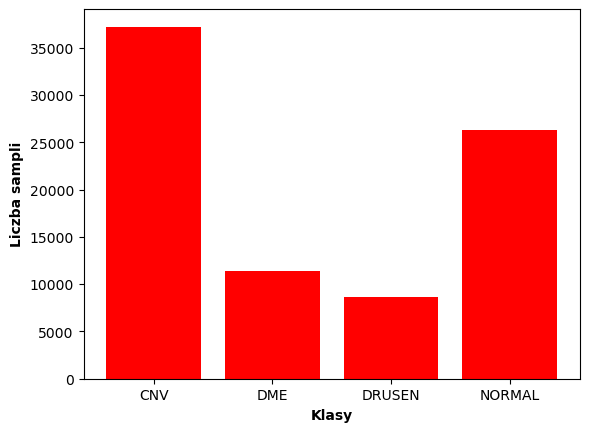

In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt

path = "../OCT2017"
n_dict = {}
CNV = []
DME = []
DRUSEN = []
NORMAL = []
labels = []
for i in os.listdir(path):
    if '.' not in i:
        n_dict[i] = {}
        labels.append(i)
        for j in os.listdir('/'.join([path, i])):
            if '.' not in j:
                list = os.listdir('/'.join([path, i, j]))
                new_list = [x for x in list if '.D' not in x]
                n_dict[i].update({j: len(new_list)})
                if j == "CNV":
                    CNV.append(len(new_list))
                elif j == "DME":
                    DME.append(len(new_list))
                elif j=="DRUSEN":
                    DRUSEN.append(len(new_list))
                else:
                    NORMAL.append(len(new_list))

fig = plt.figure()
plt.bar(np.arange(4), n_dict['train'].values(), color='r')
plt.xticks([0,1,2,3], n_dict['train'].keys())
plt.ylabel("Liczba sampli", fontweight ='bold')
plt.xlabel("Klasy", fontweight ='bold')
plt.show()

In [1]:
from tensorflow import keras
from models.models import all_models

model = all_models(version='first', image_size=(256, 256, 1))

model.compile(optimizer=keras.optimizers.Adam(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 16)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

C:\Users\dawid\miniconda3\envs\tf_inz\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
keras.utils.plot_model(model, to_file="my_model.png", show_shapes=True)

Found 33696 files belonging to 4 classes.
Found 800 files belonging to 4 classes.
Found 968 files belonging to 4 classes.
31/31 [==============================] - 3s 12ms/step - loss: 0.0091 - accuracy: 0.9938
test loss, test acc: [0.009060408920049667, 0.9938016533851624]
1/1 [==============================] - 0s 76ms/step


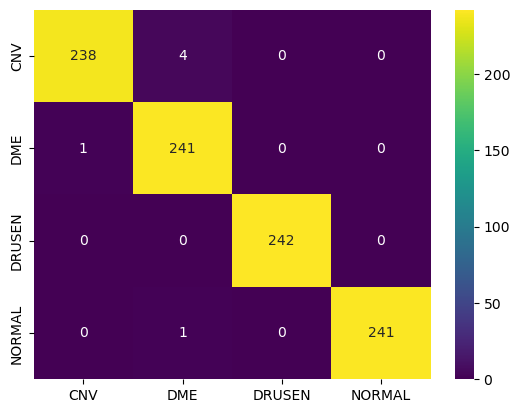

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[238,   4,   0,   0],
       [  1, 241,   0,   0],
       [  0,   0, 242,   0],
       [  0,   1,   0, 241]])>

In [2]:
from tensorflow import keras
from prepare_data.data_loader import load_data_using_keras
from vizualization.functiones_for_vizualization import confuzion_matrix_print

train_ds, val_ds, test_ds = load_data_using_keras(path='../', path_to_original_dataset="../OCT2017",
                                                  generate_new_data=False, im_size=(224, 224), val_size=50)

my_model = keras.models.load_model('./results/first/model')

results = my_model.evaluate(test_ds)

print("test loss, test acc:", results)
confuzion_matrix_print(data_set=test_ds, model=my_model, dst='./results', data_name='test', test_name='first')